In [3]:
from sklearn.cluster import KMeans
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\Shanmuga Shyam. B\OneDrive\Desktop\ml-learn\k-means\income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


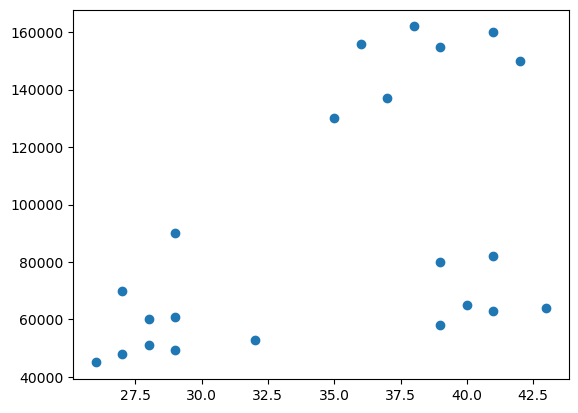

In [7]:
plt.scatter(df["Age"], df["Income($)"])

In [14]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [18]:
df["cluster"] =  y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


C:\Users\Shanmuga Shyam. B\AppData\Local\Temp\ipykernel_16736\2461454723.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


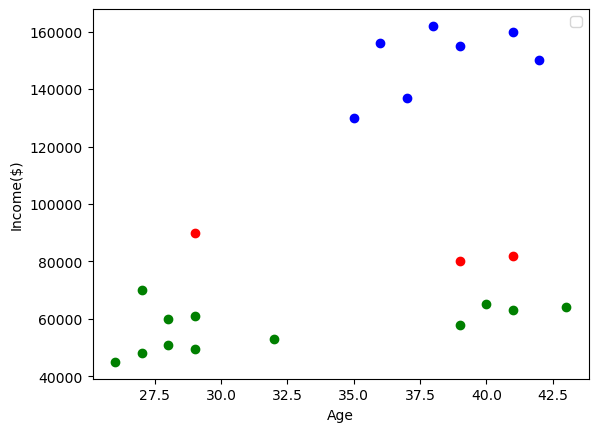

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1["Income($)"], color = "green")
plt.scatter(df2.Age,df2["Income($)"], color = "blue")
plt.scatter(df3.Age,df3["Income($)"], color = "red")
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color="purple", marker="*",label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [58]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [68]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [70]:
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


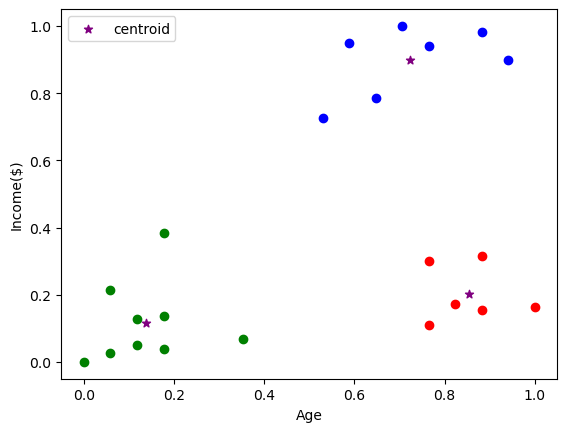

In [77]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age,df1["Income($)"], color = "green")
plt.scatter(df2.Age,df2["Income($)"], color = "blue")
plt.scatter(df3.Age,df3["Income($)"], color = "red")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color="purple", marker="*",label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [79]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [107]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k, random_state=42)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
sse

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530933,
 0.3698658919234831,
 0.282940458716048,
 0.23014252862240323,
 0.20548769627526317,
 0.14718536793995937,
 0.13246345557512862]

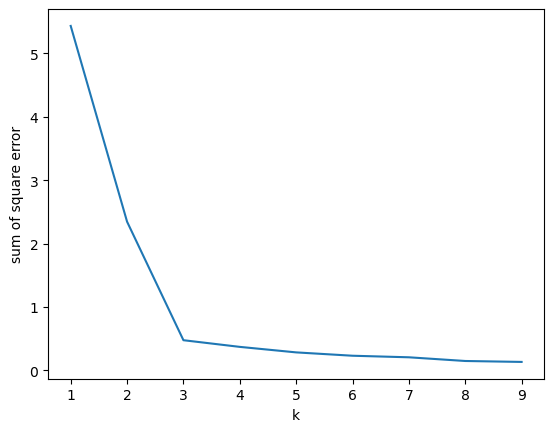

In [109]:
plt.xlabel("k")
plt.ylabel("sum of square error")
plt.plot(k_rng,sse)